# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a table, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?
 
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Make Some Chocolate Soup

1. Explore the webpage displayed in the browser. What elements could be useful to scrape here? Which elements do we _not_ want to scrape?

https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

List of Tags to Include: table, tbody, tr, td

List of Tags to Exclude: top divs(id = "banner, infoContainer, picContainer")

2. Let's make a request to this stie to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is

```
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
```
   
   You can pass this into the `.get()` method of the `requests` module to get the HTML.

In [1]:
import requests
from bs4 import BeautifulSoup

# requesting HTML module to URL website using .get() request module
choco_webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')

print(choco_webpage.content)

b'<!DOCTYPE html>\n<html lang="en">\n   <head>\n      <meta charset="utf-8">\n      <style>\n         #cacaoTable {\n         border-collapse: collapse;\n         border: 2px black solid;\n         font: 12px sans-serif;\n         }\n         #cacaoTable td {\n         border: 1px black solid;\n         padding: 5px;\n         }\n         #infoContainer {\n         margin-bottom: 10px;\n         display: inline-block;\n         margin-right: 10px;\n         }\n         #chocolate {\n         width: 300px;\n         }\n         #picContainer {\n         display: inline;\n         }\n      </style>\n   <script async src=\'/cdn-cgi/bm/cv/669835187/api.js\'></script></head>\n   <body>\n      <!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->\n      <div id="banner">\n         <h1>Cacao Ratings</h1>\n      </div>\n      <div id="infoContainer">\n         <table class="infoTable">\n            <tr>\n               <td>Compiled ratings of over 1700 Chocolate bars</td>\n            

3. Create a BeautifulSoup object called `soup` to traverse this HTML.

   Use `"html.parser"` as the parser, and the content of the response you got from your request as the document.

In [2]:
# Creating BeautifulSoup Object to parse the HTML and extract only desired tags later

soup = BeautifulSoup(choco_webpage.content, 'html.parser')


4. If you want, print out the `soup` object to explore the HTML.

   So many table rows! You're probably very relieved that we don't have to scrape this information by hand.

In [3]:
print(soup)

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
<script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script></head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<

## How are ratings distributed?

5. How many terrible chocolate bars are out there? And how many earned a perfect 5? Let's make a histogram of this data.

   The first thing to do is to put all of the ratings into a list.
   
   Use a command on the `soup` object to get all of the tags that contain the ratings.

In [4]:
# Searcing inside soup object all tags with class "Rating" and storing them inside an empty list
ratings = soup.find_all(attrs={"class": "Rating"})
ratings_list_text = []

for tags in ratings:
    ratings_list_text.append(tags.get_text())
    
#removing Ratings header that is list object index 0
ratings_list_text.pop(0)



'Rating'

6. Create an empty list called `ratings` to store all the ratings in.

In [5]:
ratings_list = []

7. Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

   As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [6]:
# converting str values to float for furhter calculations
for ratings in ratings_list_text:
    ratings_list.append(float(ratings))
    
# Printing values to check  convertion     
for ratings in ratings_list:
    print(ratings, type(ratings))

3.75 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
2.75 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
3.75 <class 'float'>
4.0 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
3.25 <class 'float'>
3.75 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
3.25 <class 'float'>
4.0 <class 'float'>
3.25 <class 'float'>
3.5 <class 'float'>
4.0 <class 'float'>
3.5 <class 'float'>
3.75 <class 'float'>
3.75 <class 'float'>
3.75 <class 'float'>
2.75 <class 'float'>
3.25 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
3.0 <class 'float'>
3.75 <class 'float'>
2.75 <class 'float'>
2.75 <class 'float'>
2.75 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
2.5 <class 'float'>
2.5 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
2.5 <class 'float'>
2.5 <class 'float'>
2.75 <class 'float

2.75 <class 'float'>
3.5 <class 'float'>
2.75 <class 'float'>
3.25 <class 'float'>
3.5 <class 'float'>
1.5 <class 'float'>
3.75 <class 'float'>
3.5 <class 'float'>
3.25 <class 'float'>
3.0 <class 'float'>
2.5 <class 'float'>
3.0 <class 'float'>
3.25 <class 'float'>
3.25 <class 'float'>
3.0 <class 'float'>
3.25 <class 'float'>
3.5 <class 'float'>
3.75 <class 'float'>
3.0 <class 'float'>
3.0 <class 'float'>
3.0 <class 'float'>
1.0 <class 'float'>
2.5 <class 'float'>
2.75 <class 'float'>
3.25 <class 'float'>
3.25 <class 'float'>
3.25 <class 'float'>
3.25 <class 'float'>
3.5 <class 'float'>
3.25 <class 'float'>
3.75 <class 'float'>
2.75 <class 'float'>
3.25 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
2.25 <class 'float'>
2.75 <class 'float'>
3.75 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
2.75 <class 'float'>
3.75 <class 'float'>
2.75 <class 'float'>
3.25 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
3.0 <class 'fl

3.0 <class 'float'>
3.25 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
3.25 <class 'float'>
3.75 <class 'float'>
2.75 <class 'float'>
2.75 <class 'float'>
3.5 <class 'float'>
2.5 <class 'float'>
3.5 <class 'float'>
3.0 <class 'float'>
3.0 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
3.25 <class 'float'>
3.25 <class 'float'>
3.25 <class 'float'>
3.5 <class 'float'>
3.0 <class 'float'>
3.25 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
3.75 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
3.0 <class 'float'>
2.5 <class 'float'>
3.75 <class 'float'>
3.25 <class 'float'>
3.75 <class 'float'>
3.0 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
2.0 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
1.5 <class 'float'>
2.25 <class 'float'>
3.5 <class 'float'>
3.75 <class 'float'>
4.0 <class 'float'>
3.5

1.5 <class 'float'>
2.5 <class 'float'>
2.75 <class 'float'>
3.25 <class 'float'>
3.0 <class 'float'>
4.0 <class 'float'>
2.5 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
2.5 <class 'float'>
2.75 <class 'float'>
2.75 <class 'float'>
2.75 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
3.0 <class 'float'>
3.25 <class 'float'>
3.25 <class 'float'>
3.25 <class 'float'>
3.25 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
3.75 <class 'float'>
3.25 <class 'float'>
3.5 <class 'float'>
3.0 <class 'float'>
2.0 <class 'float'>
2.0 <class 'float'>
3.0 <class 'float'>
3.0 <class 'float'>
2.75 <class 'float'>
3.0 <class 'float'>
3.0 <class 'float'>
3.25 <class 'float'>
2.75 <class 'float'>
2.5 <class 'float'>
2.5 <class 'float'>
3.0 <class 'float'>
3.5 <class 'float'>
3.5 <class 'float'>
2.5 <class 'float'>
2.5 <class 'float'>
2.75 <class 'float'>
3.25 <class 'float'>
2.75 <class 'float'>
4.0 <class 'float'>
3.0 <class 'float'>
2.25 <class 'float'>
3.0 <class 'float'>
3

8. Using Matplotlib, create a histogram of the ratings values:

```py
plt.hist(ratings)
```

   Remember to show the plot using `plt.show()`!

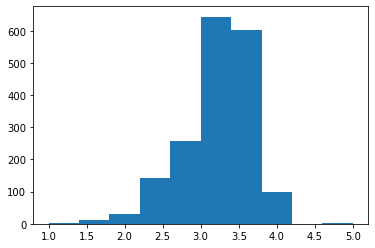

In [7]:
# Plotting rating_list to show values distribution

import matplotlib.pyplot as plt

plt.hist(ratings_list)
plt.show()

## Which chocolatier makes the best chocolate?

9. We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a `groupby` to find the ones with the highest average rating.

   First, let's find all tags on the webpage that contain the company names.

In [8]:
# Searcing inside soup object all tags with class "Company" and storing them inside an empty list

companies = soup.find_all(attrs={"class": "Company"})


10. Just like we did with ratings, we now want to make an empty list to hold company names.

In [9]:
companies_list = []


11. Loop through the tags containing the company names, and add the text from each tag to the list you just created.

In [10]:
# Loop through soup object to append every element to companies_list
for items in companies:
    companies_list.append(items.get_text())
companies_list.pop(0)
print(len(companies_list), len(ratings_list))

1795 1795


12. Create a DataFrame with a column "Company" corresponding to your companies list, and a column "Ratings" corresponding to your ratings list.

In [11]:
# importing pandas module and created a dict which stored Companies names and their ratings
import pandas as pd 
d = {"Companies": companies_list, "Ratings": ratings_list}
# using pandas to generate a DataFrame from previous dict
df = pd.DataFrame.from_dict(d)
print(df)

     Companies  Ratings
0     A. Morin     3.75
1     A. Morin     2.75
2     A. Morin     3.00
3     A. Morin     3.50
4     A. Morin     3.50
...        ...      ...
1790    Zotter     3.75
1791    Zotter     3.00
1792    Zotter     3.50
1793    Zotter     3.25
1794    Zotter     3.00

[1795 rows x 2 columns]


13. Use `.grouby` to group your DataFrame by Company and take the average of the grouped ratings.

    Then, use the `.nlargest` command to get the 10 highest rated chocolate companies. Print them out.
    
    Look at the hint if you get stuck on this step!

In [12]:
mean_ratings = df.groupby('Companies').Ratings.mean()
print(mean_ratings, "\n")
best_ten = mean_ratings.nlargest(10)
print("TOP 10 By Rating \n",best_ten)

Companies
A. Morin                  3.380435
AMMA                      3.500000
Acalli                    3.750000
Adi                       3.250000
Aequare (Gianduja)        2.875000
                            ...   
hello cocoa               3.125000
hexx                      3.050000
iQ Chocolate              2.875000
organicfair               2.850000
twenty-four blackbirds    3.041667
Name: Ratings, Length: 416, dtype: float64 

TOP 10 By Rating 
 Companies
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


## Is more cacao better?

14. We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

    It looks like the cocoa percentages are in the table under the Cocoa Percent column (note we are looking at cocoa not cocao!)
    
    Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as a float, after stripping off the `%` character.

In [13]:
# Searcing inside soup object all tags with class "CocoaPercent", converting them to float and appending them to empty list
cocoa_percentage = soup.find_all(attrs={"class": "CocoaPercent"})
cocoa_percentage_text = []
cocoa_percentage_float = []
for items in cocoa_percentage:
    cocoa_percentage_text.append(items.get_text())
cocoa_percentage_text.pop(0)   
print(cocoa_percentage_text[:10])

for items in cocoa_percentage_text:
    float_items = items.strip('%')
    cocoa_percentage_float.append(float(float(float_items)/100))
    
print(cocoa_percentage_float[:10])

['63%', '70%', '70%', '70%', '70%', '70%', '70%', '70%', '70%', '70%']
[0.63, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


15. Add the cocoa percentages as a column called `"CocoaPercentage"` in the DataFrame that has companies and ratings in it.

In [24]:
#Creating dictionary who stores Companies name, Ratings and CocoaPercent
d = {"Companies": companies_list, "Ratings": ratings_list, "CocoaPercent": cocoa_percentage_float}
#Creating related dataframe
df = pd.DataFrame.from_dict(d)
print("DATAFRAME: \n", df, '\n')
# Groupby Companies and getting mean for their cocoa_percent values
mean_ratings = df.groupby('Companies').CocoaPercent.mean()
print("COMPANIES COCOA_PERCENT AVERAGE: \n", mean_ratings, "\n")
# Printing top 10 for Cocoa_percent value
best_ten = mean_ratings.nlargest(10)
print("TOP 10 BY COCOA_PERCENT \n",best_ten)

DATAFRAME: 
      Companies  Ratings  CocoaPercent
0     A. Morin     3.75          0.63
1     A. Morin     2.75          0.70
2     A. Morin     3.00          0.70
3     A. Morin     3.50          0.70
4     A. Morin     3.50          0.70
...        ...      ...           ...
1790    Zotter     3.75          0.70
1791    Zotter     3.00          0.65
1792    Zotter     3.50          0.65
1793    Zotter     3.25          0.62
1794    Zotter     3.00          0.65

[1795 rows x 3 columns] 

COMPANIES COCOA_PERCENT AVERAGE: 
 Companies
A. Morin                  0.69087
AMMA                      0.69000
Acalli                    0.70000
Adi                       0.75000
Aequare (Gianduja)        0.62500
                           ...   
hello cocoa               0.65500
hexx                      0.71400
iQ Chocolate              0.72000
organicfair               0.72400
twenty-four blackbirds    0.73500
Name: CocoaPercent, Length: 416, dtype: float64 

TOP 10 BY COCOA_PERCENT 
 Companies

16. Make a scatterplot of ratings (`your_df.Rating`) vs percentage of cocoa (`your_df.CocoaPercentage`).

    You can do this in Matplotlib with these commands:
    
```py
plt.scatter(df.CocoaPercentage, df.Rating)
plt.show()
```

Call `plt.clf()` to clear the figure between showing your histogram and this scatterplot.

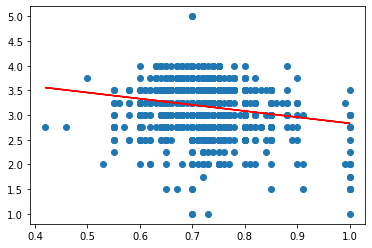

In [15]:
#Importing numpy and plotting Cocoa_Percent and Ratings to check existing correlation
import numpy as np
plt.scatter(df.CocoaPercent, df.Ratings)
z = np.polyfit(df.CocoaPercent, df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercent, line_function(df.CocoaPercent), "r-")

plt.show()

17. Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

    Copy this code and paste it after you create the scatterplot, but before you call `.show()`:
    
```py
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
```

## Explore!

18. We have explored a couple of the questions about chocolate that inspired us when we looked at this chocolate table.

    What other kinds of questions can you answer here? Try to use a combination of BeautifulSoup and Pandas to explore some more.
    
    For inspiration: Where are the best cocoa beans grown? Which countries produce the highest-rated bars?

In [40]:
# Searching inside soup object for all tags with class BroadBeanOrigin and storing inside an empty list
origins_country = soup.find_all(attrs={"class": "BroadBeanOrigin"})

origins_country_list = []

for countries in origins_country:
    origins_country_list.append(countries.get_text())
origins_country_list.pop(0)

#Creating dictionary who stores origins and ratings values then generating datafram using pandas
d = {"Country": origins_country_list, "CocoaPercent": cocoa_percentage_float}
df = pd.DataFrame.from_dict(d)
mean_ratings = df.groupby('Country').CocoaPercent.mean()

print("EXAMPLE DATAFRAME: \n", df, "\n")
print("COCOA PERCENT AVERAGE BY BEAN COUNTRY: \n", mean_ratings)
top_ten = mean_ratings.nlargest(20)
print("\nTOP 10 ORIGIN COUNTRY BY BEAN COCOA PERCENTAGE: \n", top_ten)


production_country = soup.find_all(attrs={"class": "CompanyLocation"})

production_country_list = []
for countries in production_country:
    production_country_list.append(countries.get_text())
production_country_list.pop(0)


d = {"Country": production_country_list, "Ratings": ratings_list}
df = pd.DataFrame.from_dict(d)
mean_ratings = df.groupby('Country').Ratings.mean()


top_ten = mean_ratings.nlargest(5)
print("\nTOP 10 PRODUCTION COUNTRY BY AVERAGE RATINGS: \n", top_ten)

EXAMPLE DATAFRAME: 
        Country  CocoaPercent
0     Sao Tome          0.63
1         Togo          0.70
2         Togo          0.70
3         Togo          0.70
4         Peru          0.70
...        ...           ...
1790      Peru          0.70
1791     Congo          0.65
1792     India          0.65
1793     India          0.62
1794    Brazil          0.65

[1795 rows x 2 columns] 

COCOA PERCENT AVERAGE BY BEAN COUNTRY: 
 Country
                             0.720000
Africa, Carribean, C. Am.    0.740000
Australia                    0.690000
Belize                       0.734490
Bolivia                      0.717018
                               ...   
Venezuela, Trinidad          0.620000
Venezuela/ Ghana             0.850000
Vietnam                      0.735263
West Africa                  0.728333
                             0.712603
Name: CocoaPercent, Length: 101, dtype: float64

TOP 10 ORIGIN COUNTRY BY BEAN COCOA PERCENTAGE: 
 Country
Peru, Ecuador                 